In [66]:
# install.packages("reticulate")
# library(reticulate)
# use_condaenv("DataScience")

install.packages("sf", type = "binary")
install.packages("rnaturalearth", type = "binary")
install.packages("rnaturalearthdata", type = "binary")
 
library(tidyverse)
library(sf)
library(rnaturalearth)
library(rnaturalearthdata)

library(ggplot2)

printf <- function(...) cat(sprintf(...))

Warning message:
"Paket 'sf' wird gerade benutzt und deshab nicht installiert"
Warning message:
"Paket 'rnaturalearth' wird gerade benutzt und deshab nicht installiert"
Warning message:
"Paket 'rnaturalearthdata' wird gerade benutzt und deshab nicht installiert"


# Daten laden

In [67]:
df <- read.table("data\\salaries.csv", sep = ",", header = TRUE)
df
mode(df)

work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employee_residence_country_name,company_location_country_name
<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
2023,SE,FT,Software Data Engineer,210000,USD,210000,US,100,US,L,United States,United States
2023,MI,FT,Machine Learning Research Engineer,90000,USD,90000,SA,100,SA,M,Saudi Arabia,Saudi Arabia
2023,MI,FT,Data Analyst,55000,EUR,59401,DE,50,DE,L,Germany,Germany
2023,SE,FT,Analytics Engineer,90000,USD,90000,US,0,US,M,United States,United States
2023,SE,FT,Analytics Engineer,84000,USD,84000,US,0,US,M,United States,United States
2023,SE,FT,Data Analyst,160000,USD,160000,US,100,US,M,United States,United States
2023,SE,FT,Data Analyst,140000,USD,140000,US,100,US,M,United States,United States
2023,SE,FT,Analytics Engineer,221300,USD,221300,US,0,US,M,United States,United States
2023,SE,FT,Analytics Engineer,147500,USD,147500,US,0,US,M,United States,United States


[1] "list"

# Histogram (Häufigkeitstabelle) für Gehalt in USD

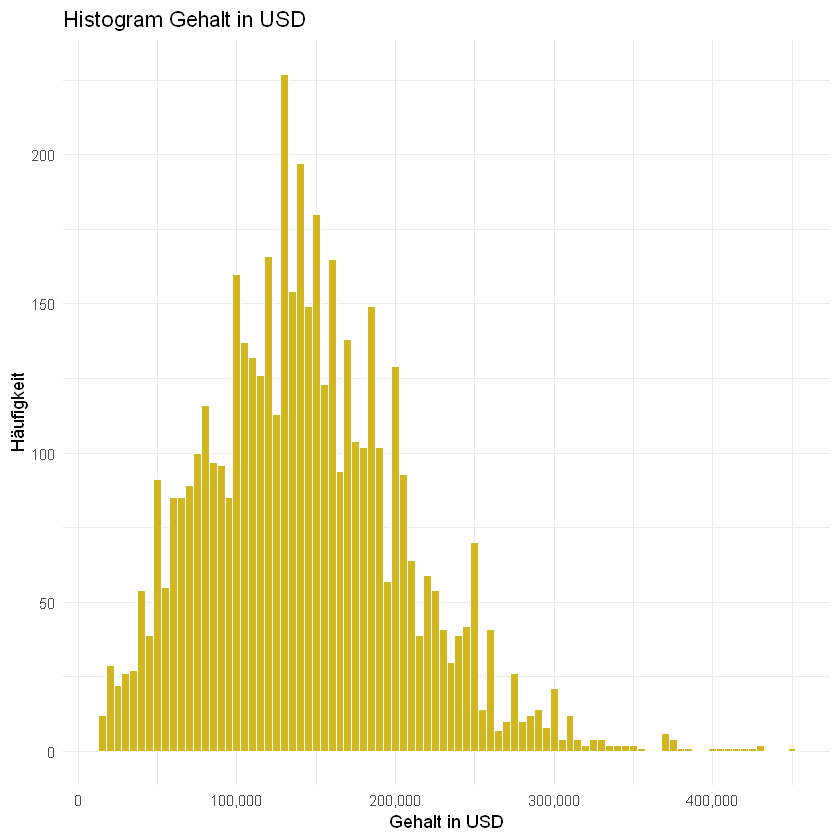

In [68]:
ggplot(data = df, aes(x = salary_in_usd)) +
  geom_histogram(binwidth = 5000, fill = "#d1b620", color = "white") +
  labs(title = "Histogram Gehalt in USD", x = "Gehalt in USD", y = "Häufigkeit") +
  scale_x_continuous(labels = scales::comma) +
  theme_minimal()

rechtsschief / linkssteil

In [69]:
print("Zusammenfassung:")
summary(df$salary_in_usd)
print("Standardabweichung:")
sd(df$salary_in_usd)

[1] "Zusammenfassung:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15000  100000  140000  143427  182500  450000 

[1] "Standardabweichung:"


[1] 62667.24

Min: Geringster Wert im Datensatz  
Max: Höchster Wert im Datensatz  
1st Quartil: 25 % Der Werte sind kleiner als 1st Quartil, 75 % der Werte größer  
3rd Quartil: 75 % Der Werte sind kleiner als 1st Quartil, 25 % der Werte größer  
Median (Zentralwert): Der Wert, der genau in der Mitte einer Datenverteilung liegt  
Mean (avg, Durchschnitt, Mittelwert): 2nd Quartil, 50 % Der Werte sind kleiner als 1st Quartil, 50 % der Werte größer  
Standardabweichung: durchschnittliche Abweichung vom Mittelwert  

Grobe Erklärung:  
https://de.statista.com/statistik/lexikon/definition/106/quantil/  
https://de.statista.com/statistik/lexikon/definition/91/mittelwert_und_arithmetisches_mittel/  

# Histogram Work Year

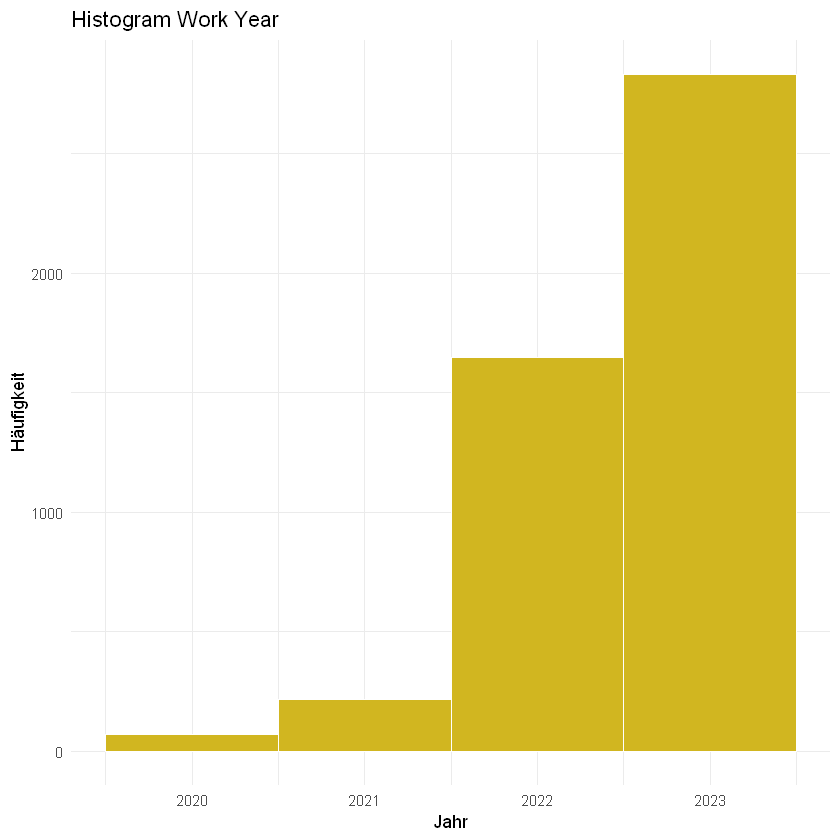

In [70]:
ggplot(data = df, aes(x = work_year)) +
  geom_histogram(binwidth = 1, fill = "#d1b620", color = "white") +
  labs(title = "Histogram Work Year", x = "Jahr", y = "Häufigkeit") +
  theme_minimal()

In [71]:
print("Zusammenfassung:")
summary(df$work_year)
print("Standardabweichung:")
sd(df$work_year)

[1] "Zusammenfassung:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2020    2022    2023    2023    2023    2023 

[1] "Standardabweichung:"


[1] 0.6549009

# employee_residence map log10

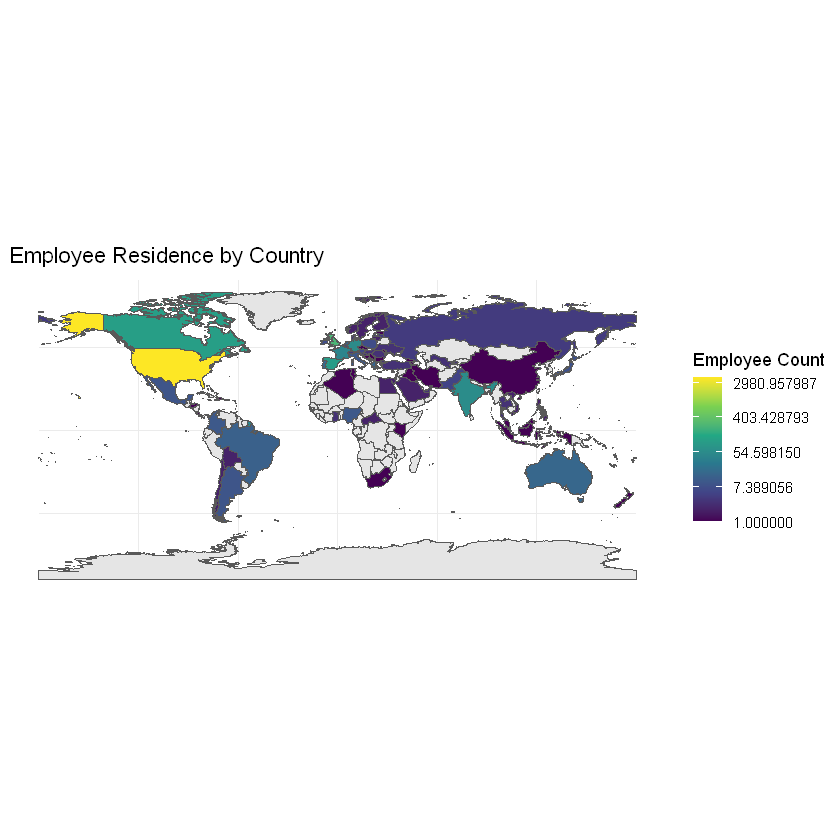

In [116]:
world <- ne_countries(scale = "medium", returnclass = "sf")
agg_emp_data <- df %>%
    group_by(employee_residence) %>%
    summarise(emp_count = n())

# Join employee data with world map data
world_with_emp_data <- world %>%
    left_join(agg_emp_data, by = c("iso_a2" = "employee_residence"))

ggplot(data = world_with_emp_data) +
    geom_sf(aes(fill = emp_count)) +
    scale_fill_viridis_c(
        option = "viridis", trans = "log10",
        na.value = "gray90", guide = guide_colorbar(title = "Employee Count")
    ) +
    labs(title = "Employee Residence by Country") +
    theme_minimal()


# company_location Map

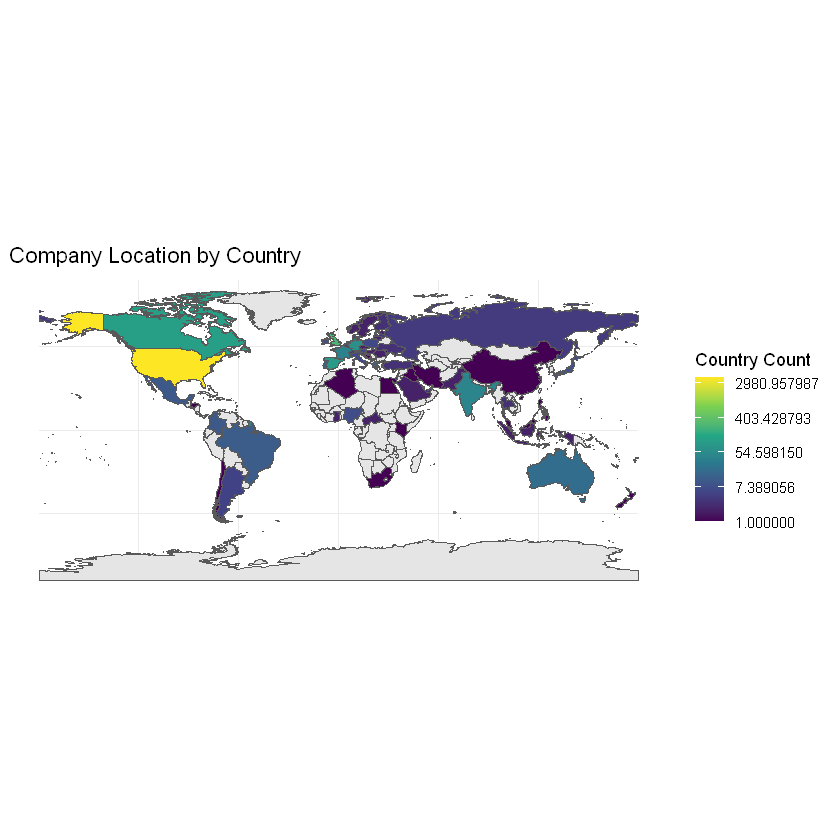

In [117]:
agg_company_data <- df %>%
    group_by(company_location) %>%
    summarise(comp_count = n())

# Join employee data with world map data
world_with_company_data <- world %>%
    left_join(agg_company_data, by = c("iso_a2" = "company_location"))

ggplot(data = world_with_company_data) +
    geom_sf(aes(fill = comp_count)) +
    scale_fill_viridis_c(
        option = "viridis", trans = "log10",
        na.value = "gray90", guide = guide_colorbar(title = "Country Count")
    ) +
    labs(title = "Company Location by Country") +
    theme_minimal()

# Anderes

In [118]:
df_summary <- df %>%
  group_by(experience_level) %>%
  summarize(mean_salary = mean(salary), median_salary = median(salary)) %>%
  gather(key = "statistic", value = "value", mean_salary, median_salary)
df_summary


experience_level,statistic,value
<chr>,<chr>,<dbl>
EN,mean_salary,194632.1
EX,mean_salary,239449.3
MI,mean_salary,226226.7
SE,mean_salary,169895.5
EN,median_salary,80500.0
EX,median_salary,200000.0
MI,median_salary,102500.0
SE,median_salary,150000.0


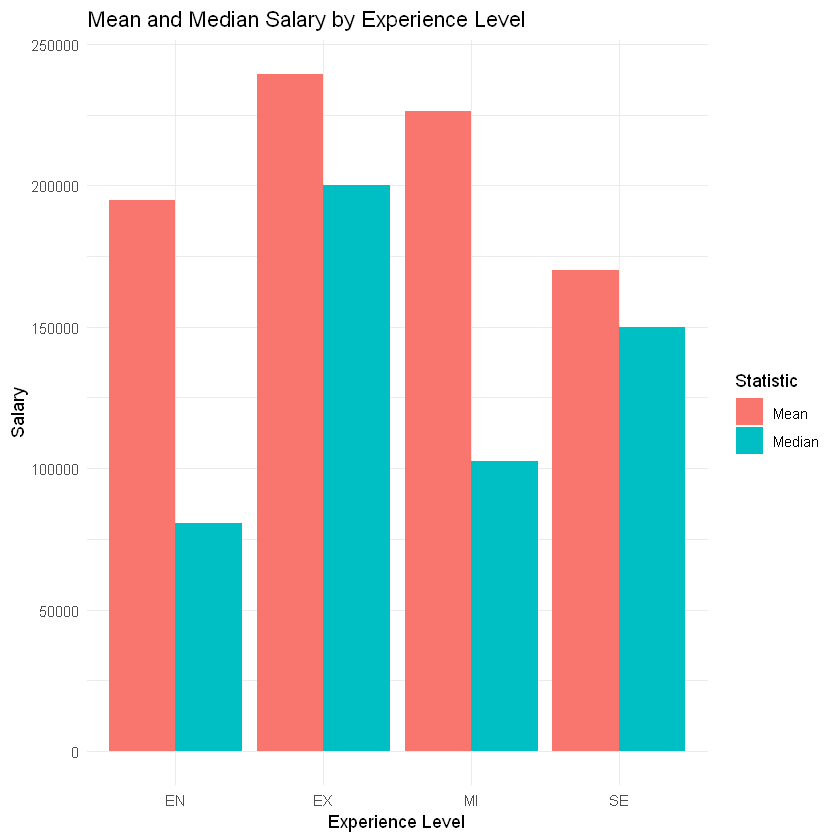

In [119]:
ggplot(data = df_summary, aes(x = experience_level, y = value, fill = statistic)) +
    geom_bar(stat = "identity", position = "dodge") +
    theme_minimal() +
    labs(y = "Salary", x = "Experience Level", title = "Mean and Median Salary by Experience Level") +
    scale_fill_discrete(name = "Statistic", labels = c("Mean", "Median"))


In [120]:
chisq.test(df$work_year, df$company_size, simulate.p.value = TRUE)


	Pearson's Chi-squared test with simulated p-value (based on 2000
	replicates)

data:  df$work_year and df$company_size
X-squared = 1140.4, df = NA, p-value = 0.0004998
